In [37]:
#INPUT_FN = "input_test.txt"
#INPUT_FN = "input_test2.txt" #res=10
#INPUT_FN = "input_test3.txt" #res=4
INPUT_FN = "input.txt" #423

with open(INPUT_FN) as f:
    lines = [l.rstrip() for l in f]

In [2]:
for s in lines:
    print(s)

F7---|FJ-L-|7-7F-7.F7|-|F-L7F7--7F---FJ7-F-F.FF.J---|77--7FF-7.-7-|.7FF-77F|77.|7-FF7FJFJ7-7FF77L77F7-F.|FFJ.-|-77.JFF-|J-|F|77F77.F7-F7-FF7
LF7J.L7J7LFJF.FL-|-|LL.L7LL7-|7JFL|FJ.|.7.LL7J--JJ.LL-J7|JF|FJ7.F7---7J-|F|J77..7FJJ||F-7|.LFJ-F7--F7-L.LFJF77|LJF7--7.L7LF7L-7L777JFJ|FFL7-
|J|.FL7F7.L-7-77.F.|..LFL.LJ-J-77.L-|-..F7LLJF|.F.FF--7FFF-JL7FF7J.|L-77L7L|.FFLLJ7.JFL-F77..FLJ||.LF7J7F.F7.F--FL77LJ7F|.J7L|L7LLF-7-F7FJ|L
|-JFJ--777.F|FLL-|-7-F-|JL.L7|7|L-J||.LFL7...FL7||LJ.F7|||F-7L-J|..77-JJ.|7JFL7J7FJ7|FJ7L77FF7JFJF-77J77L.L|LJJ-L7|L|J|F-7-J-FL--|LJ|-7L|LF.
L7.LF|JLJ---|-JL-J.J-F.F-JF|FJJL-J.F7J7|.J-F|7FJ-F-J7F77LLJ.|F--JJFLL7JL-JJ-LJ|FFL|-||.7J|JFJL7.LL7L-7F|-L.LJ..LFF7---JJJF7-7FFJFLJL|L-F--JL
|F-JLL--J|L|JL7L||F..L|J.|FL77L7|7-||7FJ.FLLJ|7|L|L|-7.7F|FFJL-7FL7|||F|L|J||FL-J7|-|LF77F7|F7|77FJF-J7J7-LJ|F---FJLLF.|.|JFJ7|JFJ-FJ..|L||.
FJ7|.FJ-||-7F||7LFL.L-JJ7F-J||LLJJ.L|7||F-.J-|FJ-|J|-F-77F7L7F7L7L|FFLF77L--F.LLJ-|7JFLJF||LJ||77L7|F777F-J-J|.J7L..L|F-|.F-LLL77J.L777|7LF-
|.F|7JJ7L|.||

Can use networkx or our own version of more simple graph

In [3]:
from dataclasses import dataclass

PIPE_GROUND=0
PIPE_START=1
PIPE=2

@dataclass
class pipe:
    conn_sides: tuple
    type:int = PIPE_GROUND


Maybe this class is not needed

Parse to a grid

In [4]:
diagr = []

start_pipe = None
for irow,line in enumerate(lines):
    if len(line)>0:
        row =[]
        for icol,s in enumerate(line):
            row.append(s)
            if s=='S':
                start_pipe=(irow,icol)
        diagr.append(row)
        

In [5]:
diagr

[['F',
  '7',
  '-',
  '-',
  '-',
  '|',
  'F',
  'J',
  '-',
  'L',
  '-',
  '|',
  '7',
  '-',
  '7',
  'F',
  '-',
  '7',
  '.',
  'F',
  '7',
  '|',
  '-',
  '|',
  'F',
  '-',
  'L',
  '7',
  'F',
  '7',
  '-',
  '-',
  '7',
  'F',
  '-',
  '-',
  '-',
  'F',
  'J',
  '7',
  '-',
  'F',
  '-',
  'F',
  '.',
  'F',
  'F',
  '.',
  'J',
  '-',
  '-',
  '-',
  '|',
  '7',
  '7',
  '-',
  '-',
  '7',
  'F',
  'F',
  '-',
  '7',
  '.',
  '-',
  '7',
  '-',
  '|',
  '.',
  '7',
  'F',
  'F',
  '-',
  '7',
  '7',
  'F',
  '|',
  '7',
  '7',
  '.',
  '|',
  '7',
  '-',
  'F',
  'F',
  '7',
  'F',
  'J',
  'F',
  'J',
  '7',
  '-',
  '7',
  'F',
  'F',
  '7',
  '7',
  'L',
  '7',
  '7',
  'F',
  '7',
  '-',
  'F',
  '.',
  '|',
  'F',
  'F',
  'J',
  '.',
  '-',
  '|',
  '-',
  '7',
  '7',
  '.',
  'J',
  'F',
  'F',
  '-',
  '|',
  'J',
  '-',
  '|',
  'F',
  '|',
  '7',
  '7',
  'F',
  '7',
  '7',
  '.',
  'F',
  '7',
  '-',
  'F',
  '7',
  '-',
  'F',
  'F',
  '7'],
 ['L',
  'F',
  '7'

In [6]:
nrows = len(diagr)
ncols = len(diagr[0])
print(f"{nrows=} , {ncols=}")

nrows=140 , ncols=140


In [7]:
start_pipe

(76, 109)

From start pipe move in all directions (BFS) until complete

In [8]:
def going_dir_get_next_pos(pos):
    # From position, go along direction
    # returns new_dir and next pos
    #Return None if not possible

    irow,icol, flow_dir = pos

    pipe0 = diagr[irow][icol]

    print(f"going_dir_get_next_pos , {irow=},{icol=}, {flow_dir=}, {pipe0=}")
    #going right E
    if ((flow_dir=='E' and pipe0=='-') or
        (flow_dir=='S' and pipe0=='L') or
        (flow_dir=='N' and pipe0=='F')):
        return (irow, icol+1,'E')
    # going left W
    if ((flow_dir=='W' and pipe0=='-') or
        (flow_dir=='S' and pipe0=='J') or
        (flow_dir=='N' and pipe0=='7')):
        return (irow, icol-1, 'W')
    # going up N
    if ((flow_dir=='N' and pipe0=='|') or
        (flow_dir=='E' and pipe0=='J') or
        (flow_dir=='W' and pipe0=='L')):
        return (irow-1, icol,'N')
    # going down S
    if ((flow_dir=='S' and pipe0=='|') or
        (flow_dir=='E' and pipe0=='7') or
        (flow_dir=='W' and pipe0=='F')):
        return (irow+1, icol,'S')
    
    return None

In [9]:
#Check dirs from start position
irow,icol = start_pipe

next_positions_to_test = [(irow-1, icol, 'N'), (irow+1, icol, 'S'), (irow, icol-1,'W'), (irow,icol+1, 'E')]
#filter valid based in boundaries
next_poss=[]
for test0 in next_positions_to_test:
    jrow,jcol,_ = test0
    if jrow>=0 and jrow<nrows and jcol>=0 and jcol<ncols:
        next_poss.append(test0)

In [10]:
next_poss

[(75, 109, 'N'), (77, 109, 'S'), (76, 108, 'W'), (76, 110, 'E')]

This is 'half' filtered, there is no indication that there is a valid pipe on those locations

In [11]:
import numpy as np

Start at 'start' and move along to get distances

In [12]:
#initialise
dist = np.full( (nrows, ncols), +np.inf) #initialize distances
#start position
dist[irow,icol]=0

next_positions0 = next_poss  # initialise

dist_cont = 0
while True:
    dist_cont+=1

    next_positions2 = []
    for np0 in next_positions0:
        print(f"{dist_cont=}, {np0=}")
        # check
        np1 = going_dir_get_next_pos(np0)
        print(f"{np1=}")
        if np1 is not None:
            # is there a distance value already in this location?
            cur_val = dist[np0[0],np0[1]]
            if dist_cont<cur_val:
                dist[np0[0], np0[1]]=dist_cont
                next_positions2.append(np1)
    
    if len(next_positions2)==0:
        break
    next_positions0=next_positions2

dist_cont=1, np0=(75, 109, 'N')
going_dir_get_next_pos , irow=75,icol=109, flow_dir='N', pipe0='F'
np1=(75, 110, 'E')
dist_cont=1, np0=(77, 109, 'S')
going_dir_get_next_pos , irow=77,icol=109, flow_dir='S', pipe0='7'
np1=None
dist_cont=1, np0=(76, 108, 'W')
going_dir_get_next_pos , irow=76,icol=108, flow_dir='W', pipe0='L'
np1=(75, 108, 'N')
dist_cont=1, np0=(76, 110, 'E')
going_dir_get_next_pos , irow=76,icol=110, flow_dir='E', pipe0='|'
np1=None
dist_cont=2, np0=(75, 110, 'E')
going_dir_get_next_pos , irow=75,icol=110, flow_dir='E', pipe0='7'
np1=(76, 110, 'S')
dist_cont=2, np0=(75, 108, 'N')
going_dir_get_next_pos , irow=75,icol=108, flow_dir='N', pipe0='|'
np1=(74, 108, 'N')
dist_cont=3, np0=(76, 110, 'S')
going_dir_get_next_pos , irow=76,icol=110, flow_dir='S', pipe0='|'
np1=(77, 110, 'S')
dist_cont=3, np0=(74, 108, 'N')
going_dir_get_next_pos , irow=74,icol=108, flow_dir='N', pipe0='F'
np1=(74, 109, 'E')
dist_cont=4, np0=(77, 110, 'S')
going_dir_get_next_pos , irow=77,icol=110, f

In [13]:
dist

array([[inf, inf, inf, ..., inf, inf, inf],
       [inf, inf, inf, ..., inf, inf, inf],
       [inf, inf, inf, ..., inf, inf, inf],
       ...,
       [inf, inf, inf, ..., inf, inf, inf],
       [inf, inf, inf, ..., inf, inf, inf],
       [inf, inf, inf, ..., inf, inf, inf]])

In [14]:
dist_clean= np.where(dist==np.inf, 0,dist )

In [15]:
dist_clean

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
int(dist_clean.max())

6697

# Part2

In [17]:
diagr_visited_flow_mask = np.where(dist==np.inf, False, True)

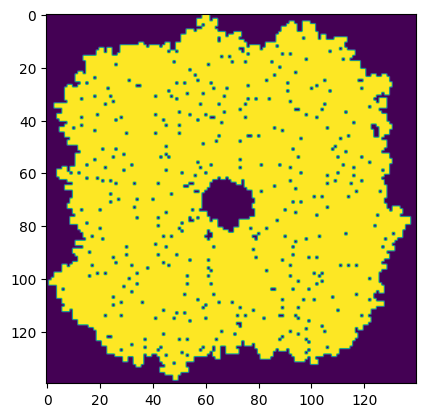

In [18]:
import matplotlib.pyplot as plt
plt.imshow(diagr_visited_flow_mask)

In [19]:
# try flood fill with zero tolerance
from skimage.morphology import flood, flood_fill

In [20]:
# build outside mask
mask_out = np.zeros_like(diagr_visited_flow_mask)

#along edges
for irow in range(nrows):
    
    if not diagr_visited_flow_mask[irow,0]:
        mask_out =  np.logical_or(mask_out,flood(diagr_visited_flow_mask, seed_point=(irow,0)))
    if not diagr_visited_flow_mask[irow,ncols-1]:
        mask_out = np.logical_or(mask_out,flood(diagr_visited_flow_mask, seed_point=(irow,ncols-1)))

for icol in range(ncols):
    if not diagr_visited_flow_mask[0,icol]:
        mask_out =  np.logical_or(mask_out,flood(diagr_visited_flow_mask, seed_point=(0,icol)))
    if not diagr_visited_flow_mask[nrows-1,icol]:
        mask_out = np.logical_or(mask_out,flood(diagr_visited_flow_mask, seed_point=(nrows-1,icol)))


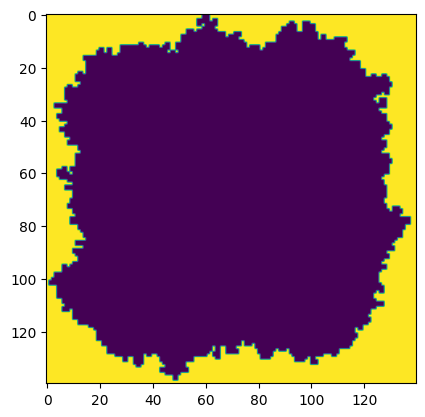

In [21]:
plt.imshow(mask_out)

In [22]:
inner_regions = np.logical_not(diagr_visited_flow_mask) & np.logical_not(mask_out)

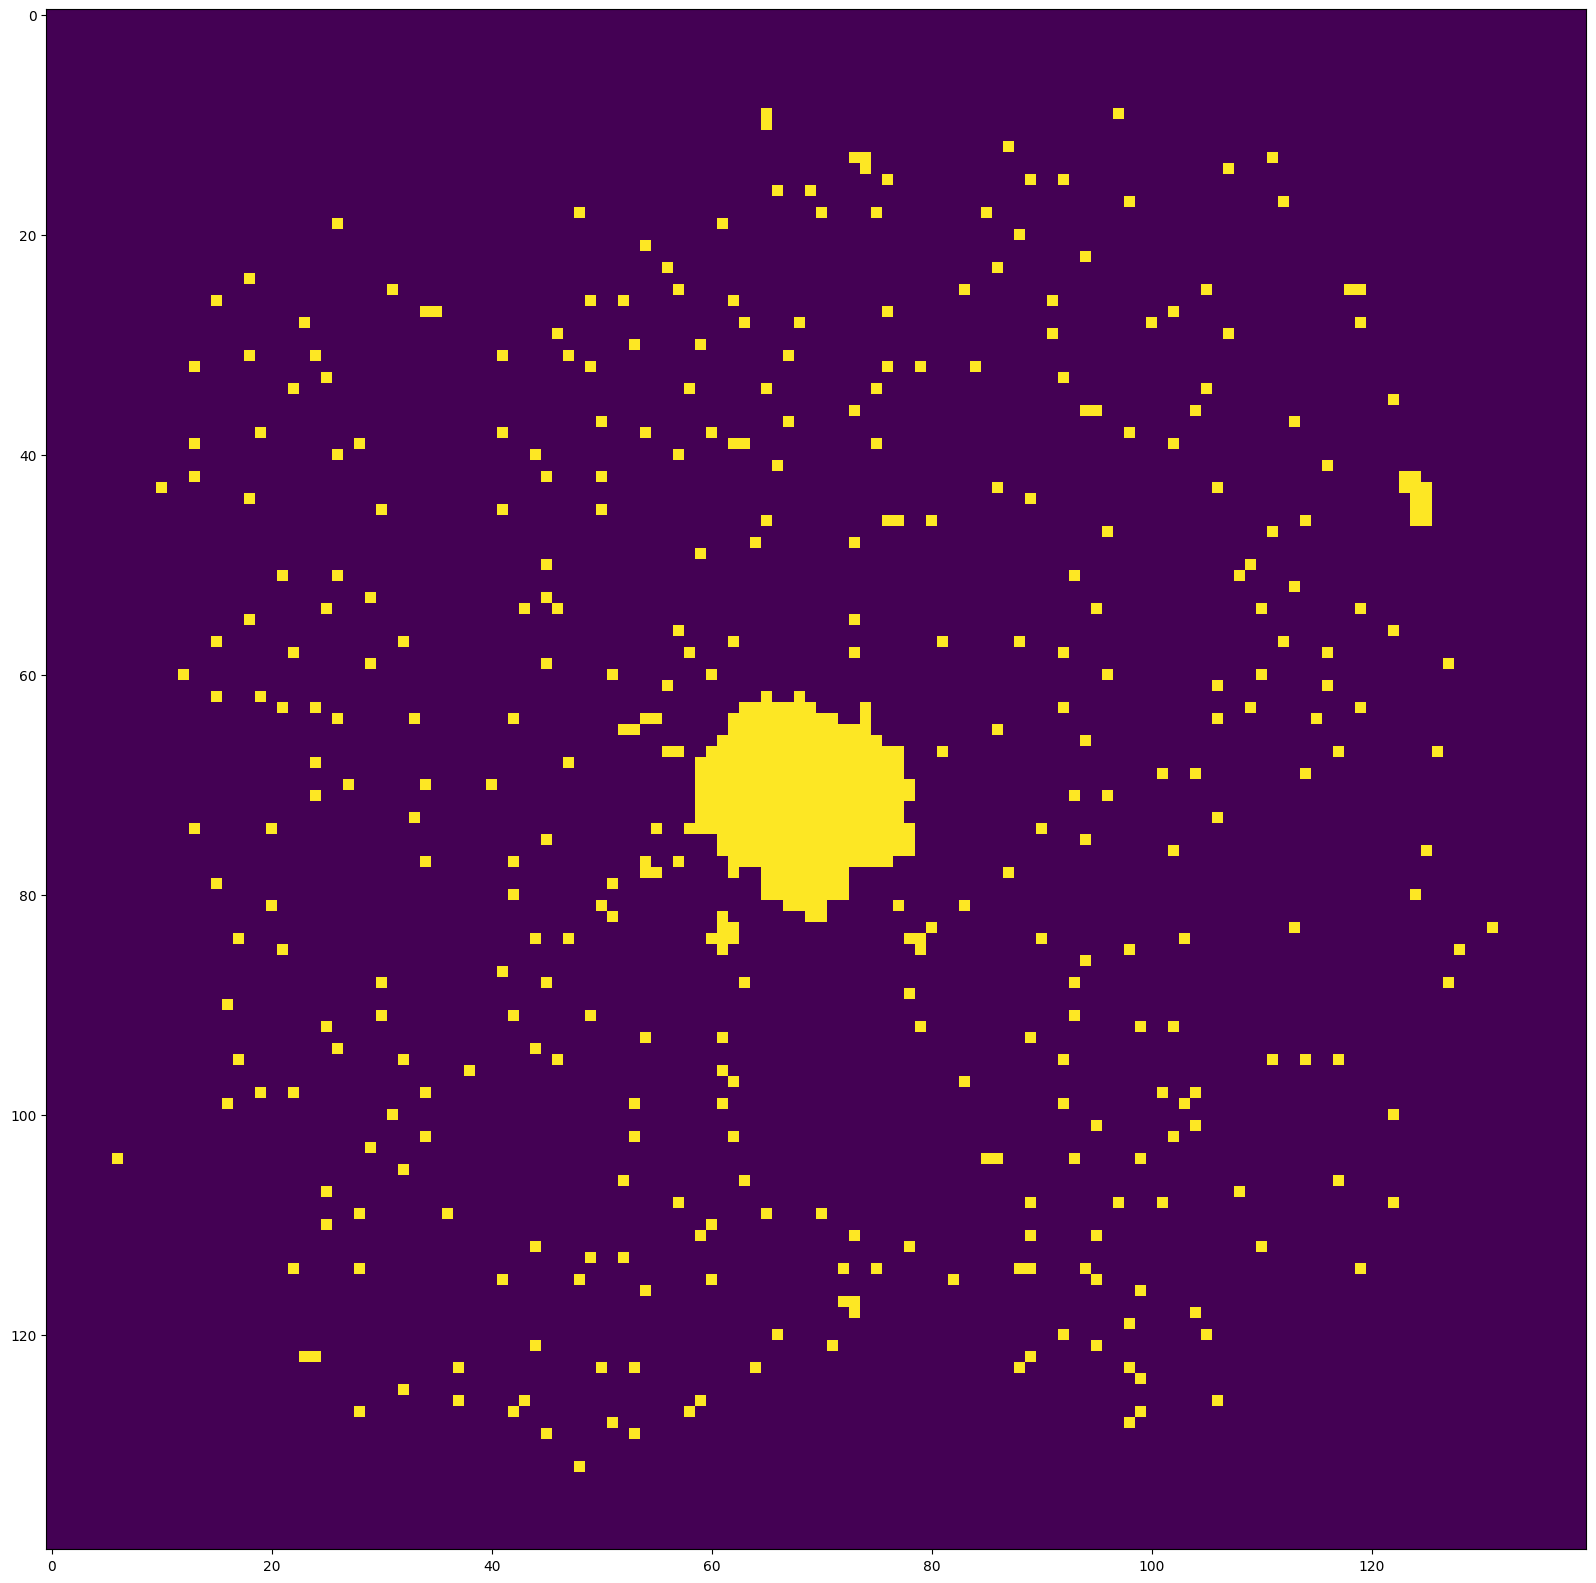

In [23]:
plt.figure(figsize=(20,20))
plt.imshow(inner_regions)

In [24]:
np.sum(inner_regions)

667

website is giving me the wrong answer. It is possible that the definition of tile being enclosed is not clear. There is a big island in the centre that may need to be excluded.

Example input_test2 gives the right answer 10

# Part2 polygon

Perhaps best way is to use shapely polygon function.

Need to get coordinates of a complete pipe loop

In [25]:
from shapely import Polygon

In [26]:
#Check dirs from start position
irow,icol = start_pipe

next_positions_to_test = [(irow-1, icol, 'N'), (irow+1, icol, 'S'), (irow, icol-1,'W'), (irow,icol+1, 'E')]
#filter valid based in boundaries
next_poss=[]
for test0 in next_positions_to_test:
    jrow,jcol,_ = test0
    if jrow>=0 and jrow<nrows and jcol>=0 and jcol<ncols:
        next_poss.append(test0)
    
next_poss

[(75, 109, 'N'), (77, 109, 'S'), (76, 108, 'W'), (76, 110, 'E')]

In [27]:
# Filter for valid
init_next_pos_valid=[]
for np1 in next_poss:
    if going_dir_get_next_pos(np1) is not None:
        init_next_pos_valid.append(np1)

going_dir_get_next_pos , irow=75,icol=109, flow_dir='N', pipe0='F'
going_dir_get_next_pos , irow=77,icol=109, flow_dir='S', pipe0='7'
going_dir_get_next_pos , irow=76,icol=108, flow_dir='W', pipe0='L'
going_dir_get_next_pos , irow=76,icol=110, flow_dir='E', pipe0='|'


In [28]:
init_next_pos_valid

[(75, 109, 'N'), (76, 108, 'W')]

In [29]:
next_positions0 = init_next_pos_valid[0]  # initialise with only the first one and stop when reaching start

loop_positions=[next_positions0]

while True:
    # check
    np1 = going_dir_get_next_pos(next_positions0)
    if np1 is not None:
        loop_positions.append(np1)
        if np1[0]==start_pipe[0] and np1[1]==start_pipe[1]:
            print("loop completed")
            break
        next_positions0 = np1

    else:
        print("Error")
        break


going_dir_get_next_pos , irow=75,icol=109, flow_dir='N', pipe0='F'
going_dir_get_next_pos , irow=75,icol=110, flow_dir='E', pipe0='7'
going_dir_get_next_pos , irow=76,icol=110, flow_dir='S', pipe0='|'
going_dir_get_next_pos , irow=77,icol=110, flow_dir='S', pipe0='L'
going_dir_get_next_pos , irow=77,icol=111, flow_dir='E', pipe0='J'
going_dir_get_next_pos , irow=76,icol=111, flow_dir='N', pipe0='|'
going_dir_get_next_pos , irow=75,icol=111, flow_dir='N', pipe0='F'
going_dir_get_next_pos , irow=75,icol=112, flow_dir='E', pipe0='J'
going_dir_get_next_pos , irow=74,icol=112, flow_dir='N', pipe0='F'
going_dir_get_next_pos , irow=74,icol=113, flow_dir='E', pipe0='7'
going_dir_get_next_pos , irow=75,icol=113, flow_dir='S', pipe0='L'
going_dir_get_next_pos , irow=75,icol=114, flow_dir='E', pipe0='J'
going_dir_get_next_pos , irow=74,icol=114, flow_dir='N', pipe0='F'
going_dir_get_next_pos , irow=74,icol=115, flow_dir='E', pipe0='-'
going_dir_get_next_pos , irow=74,icol=116, flow_dir='E', pipe0

In [30]:
loop_positions

[(75, 109, 'N'),
 (75, 110, 'E'),
 (76, 110, 'S'),
 (77, 110, 'S'),
 (77, 111, 'E'),
 (76, 111, 'N'),
 (75, 111, 'N'),
 (75, 112, 'E'),
 (74, 112, 'N'),
 (74, 113, 'E'),
 (75, 113, 'S'),
 (75, 114, 'E'),
 (74, 114, 'N'),
 (74, 115, 'E'),
 (74, 116, 'E'),
 (75, 116, 'S'),
 (75, 115, 'W'),
 (76, 115, 'S'),
 (76, 114, 'W'),
 (76, 113, 'W'),
 (76, 112, 'W'),
 (77, 112, 'S'),
 (77, 113, 'E'),
 (77, 114, 'E'),
 (77, 115, 'E'),
 (78, 115, 'S'),
 (78, 114, 'W'),
 (78, 113, 'W'),
 (78, 112, 'W'),
 (79, 112, 'S'),
 (79, 113, 'E'),
 (79, 114, 'E'),
 (79, 115, 'E'),
 (80, 115, 'S'),
 (80, 114, 'W'),
 (81, 114, 'S'),
 (81, 115, 'E'),
 (81, 116, 'E'),
 (80, 116, 'N'),
 (79, 116, 'N'),
 (78, 116, 'N'),
 (77, 116, 'N'),
 (76, 116, 'N'),
 (76, 117, 'E'),
 (77, 117, 'S'),
 (77, 118, 'E'),
 (77, 119, 'E'),
 (78, 119, 'S'),
 (78, 118, 'W'),
 (78, 117, 'W'),
 (79, 117, 'S'),
 (79, 118, 'E'),
 (79, 119, 'E'),
 (80, 119, 'S'),
 (80, 120, 'E'),
 (79, 120, 'N'),
 (78, 120, 'N'),
 (77, 120, 'N'),
 (77, 121, 'E'

In [31]:
polycoords = ( (p[0],p[1]) for p in loop_positions )

In [32]:
polycoords

<generator object <genexpr> at 0x00000250D2C1AF80>

In [33]:
polygon = Polygon(polycoords)

In [34]:
area = int(polygon.area)
area

7119

Need to subtract the half areas around perimeters to take into account pipes 'widths'

Formula to use $ PolygonArea - (Perimeter-2)/2 $

(see notes)

In [35]:
perimeter = len(loop_positions)
perimeter

13394

In [36]:
area - (perimeter-2)//2

423

OK